In [ ]:
#Functions performed: 
#data preprocessing,
#textual analysis 
#plotting wordclouds and graphs, 
#clustering based on ratings from IMDB and Rotten Tomatoes

# TEXTUAL ANALYSIS

In [ ]:
from pandas import read_csv, to_numeric
from re import sub
from nltk.tokenize import RegexpTokenizer
from nltk import download, FreqDist, corpus
from matplotlib import pyplot
from wordcloud import WordCloud, STOPWORDS
from seaborn import distplot, barplot, scatterplot
from numpy import arange
from sklearn.cluster import KMeans

In [ ]:
df = read_csv("ai tv dataset.csv")
print(df.head())
df.info()

   Unnamed: 0             Title  Year  Age  ...  Hulu Prime Video  Disney+  type
0           0      Breaking Bad  2008  18+  ...     0           0        0     1
1           1   Stranger Things  2016  16+  ...     0           0        0     1
2           2       Money Heist  2017  18+  ...     0           0        0     1
3           3          Sherlock  2010  16+  ...     0           0        0     1
4           4  Better Call Saul  2015  18+  ...     0           0        0     1

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix    

In [ ]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%').astype('float')

In [ ]:
df["Age"] = df["Age"].str.replace("+","")
df['Age'] = to_numeric(df['Age'],errors='coerce')
print(df.head())
df.info()

   Unnamed: 0             Title  Year   Age  ...  Hulu  Prime Video  Disney+  type
0           0      Breaking Bad  2008  18.0  ...     0            0        0     1
1           1   Stranger Things  2016  16.0  ...     0            0        0     1
2           2       Money Heist  2017  18.0  ...     0            0        0     1
3           3          Sherlock  2010  16.0  ...     0            0        0     1
4           4  Better Call Saul  2015  18.0  ...     0            0        0     1

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              2620 non-null   float64
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   float64
 6  

In [ ]:
df = df.dropna()

In [ ]:
names = df["Title"].values
text=' '.join(names)
print(len(text))
text[1000:1500]

13106


"er Love, Death & Robots Marvel's Jessica Jones New Girl The Good Wife The Umbrella Academy Marvel's The Punisher Ash vs Evil Dead Master of None Bodyguard Schitt's Creek Narcos: Mexico The West Wing Bates Motel Atypical Once Upon a Time Gomorrah Making a Murderer Castlevania Riverdale Burn Notice Fauda Russian Doll Our Planet Big Mouth Gotham I Am Not Okay with This The Vietnam War Waco Star Trek The OA Outer Banks The Midnight Gospel Good Girls Chilling Adventures of Sabrina Doctor Foster Gilmo"

In [ ]:
#regex to remove punctuation
text = sub(r'[^\w\s]','',text)
print(len(text))
text[1000:1500]

12931


'ots Marvels Jessica Jones New Girl The Good Wife The Umbrella Academy Marvels The Punisher Ash vs Evil Dead Master of None Bodyguard Schitts Creek Narcos Mexico The West Wing Bates Motel Atypical Once Upon a Time Gomorrah Making a Murderer Castlevania Riverdale Burn Notice Fauda Russian Doll Our Planet Big Mouth Gotham I Am Not Okay with This The Vietnam War Waco Star Trek The OA Outer Banks The Midnight Gospel Good Girls Chilling Adventures of Sabrina Doctor Foster Gilmore Girls iZombie Anne wi'

In [ ]:
tokens = RegexpTokenizer('\w+').tokenize(text)
print(len(tokens))
tokens[1000:1010]

2086


['Handmaids',
 'Tale',
 'Sons',
 'of',
 'Anarchy',
 'Gravity',
 'Falls',
 'What',
 'We',
 'Do']

In [ ]:
words = []

for word in tokens:
    words.append(word.lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


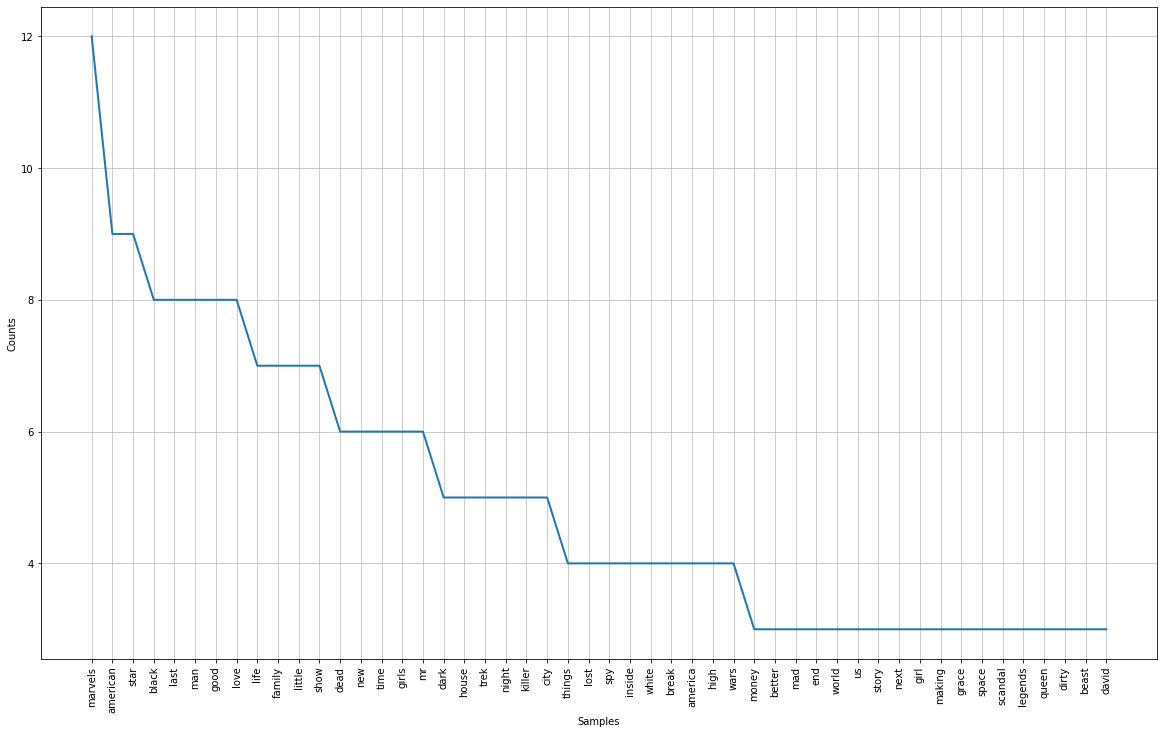

In [ ]:
download('stopwords')
stopwords = corpus.stopwords.words('english')

words_new = []

for word in words:
    if word not in stopwords:
        words_new.append(word)

freq_dist = FreqDist(words_new)
pyplot.subplots(figsize=(20,12))
freq_dist.plot(50)
res = ' '.join([i for i in words_new if not i.isdigit()])

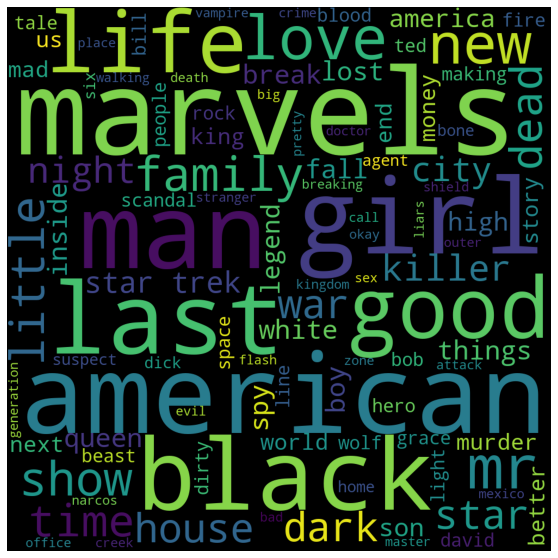

In [ ]:
pyplot.subplots(figsize=(16, 10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=100,
                          width=1000,
                          height=1000
                         ).generate(res)
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

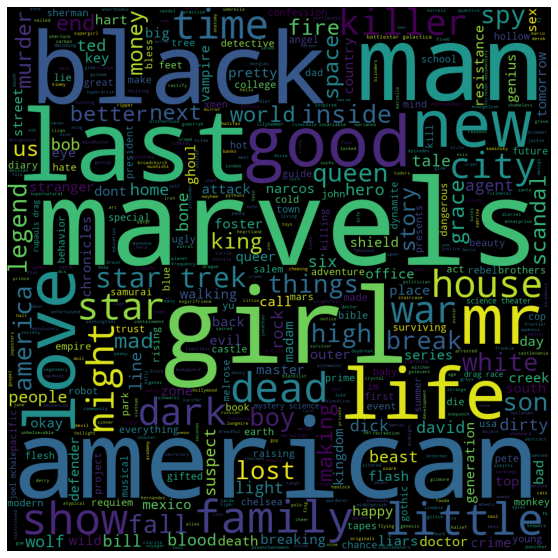

In [ ]:
pyplot.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=500,
                          width=1000,
                          height=1000
                         ).generate(res)
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

In [ ]:
print(len(text))
print(len(res))

12931
11094


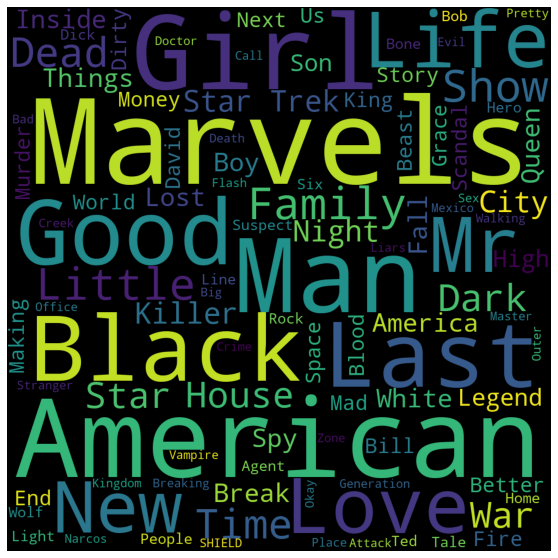

In [ ]:
pyplot.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=100,
                          width=1000,
                          height=1000
                         ).generate(text)
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

In [ ]:
text[1000:1500]

'ots Marvels Jessica Jones New Girl The Good Wife The Umbrella Academy Marvels The Punisher Ash vs Evil Dead Master of None Bodyguard Schitts Creek Narcos Mexico The West Wing Bates Motel Atypical Once Upon a Time Gomorrah Making a Murderer Castlevania Riverdale Burn Notice Fauda Russian Doll Our Planet Big Mouth Gotham I Am Not Okay with This The Vietnam War Waco Star Trek The OA Outer Banks The Midnight Gospel Good Girls Chilling Adventures of Sabrina Doctor Foster Gilmore Girls iZombie Anne wi'

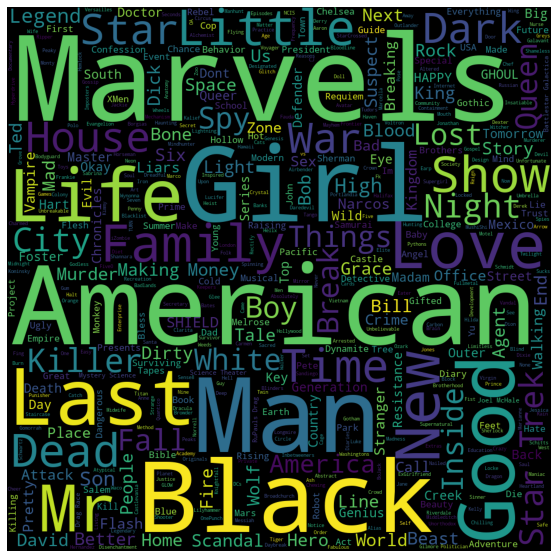

In [ ]:
pyplot.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=500,
                          width=1000,
                          height=1000
                         ).generate(text)
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

# NUMERICAL

In [ ]:
print(df.head())
df.info()

   Unnamed: 0             Title  Year   Age  ...  Hulu  Prime Video  Disney+  type
0           0      Breaking Bad  2008  18.0  ...     0            0        0     1
1           1   Stranger Things  2016  16.0  ...     0            0        0     1
2           2       Money Heist  2017  18.0  ...     0            0        0     1
3           3          Sherlock  2010  16.0  ...     0            0        0     1
4           4  Better Call Saul  2015  18.0  ...     0            0        0     1

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 5575
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       915 non-null    int64  
 1   Title            915 non-null    object 
 2   Year             915 non-null    int64  
 3   Age              915 non-null    float64
 4   IMDb             915 non-null    float64
 5   Rotten Tomatoes  915 non-null    float64
 6   

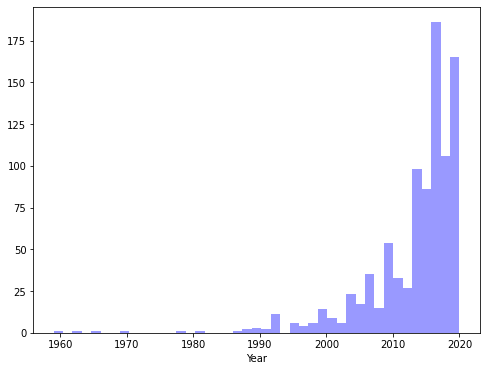

In [ ]:
pyplot.subplots(figsize=(8,6))
distplot(df["Year"],kde=False, color="blue")

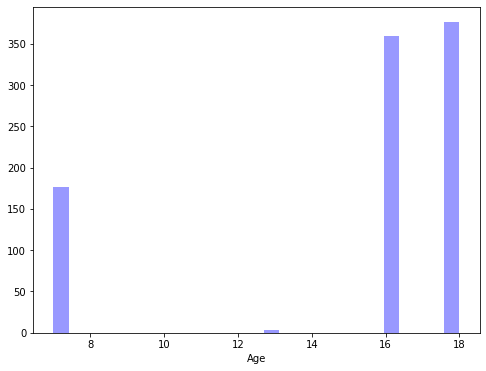

In [ ]:
pyplot.subplots(figsize=(8,6))
distplot(df["Age"],kde=False, color="blue")

In [ ]:
print((df.sort_values("IMDb",ascending=False).head(20))['Title'])

0                           Breaking Bad
3567                    Band of Brothers
91                            Our Planet
3566                            The Wire
3568                        The Sopranos
1931                      Rick and Morty
9             Avatar: The Last Airbender
3                               Sherlock
97                       The Vietnam War
5465              The Imagineering Story
15      Fullmetal Alchemist: Brotherhood
59                     The Twilight Zone
1939                             Firefly
1948                       Gravity Falls
1932                               Fargo
5                             The Office
41                      When They See Us
2009                      Nathan For You
79                         The West Wing
1990                Over the Garden Wall
Name: Title, dtype: object


In [ ]:
print((df.sort_values("IMDb",ascending=True).head(20))['Title'])

2999            A Little Late with Lilly Singh
1498                              The Goop Lab
2677                          The Bachelorette
2983                                 I Am Cait
2692                                 The Hills
1102                  Bill Nye Saves the World
4186                           The Simple Life
889                       Troy: Fall of a City
2483                             American Idol
4407                         Glenn Martin, DDS
3182    What Just Happened??! with Fred Savage
2950                                  Indebted
840                                 The I-Land
4196                              Flash Gordon
867                             Brews Brothers
2571                              Utopia Falls
5498                      Star Wars Resistance
630                               Another Life
2813                           Bless the Harts
1188                          Prank Encounters
Name: Title, dtype: object


In [ ]:
print((df.sort_values("Rotten Tomatoes",ascending=False).head(20))['Title'])

1948                  Gravity Falls
3603                    Counterpart
2235              Mary Kills People
208                           Hilda
2311                         Clique
92                        Big Mouth
89                            Fauda
1957                 Adventure Time
1956               My Hero Academia
2414                            Spy
2908             Sherman's Showcase
2927                 Flirty Dancing
222                       Imposters
223                   Queer as Folk
75                   Master of None
227                     Chewing Gum
230                       The Order
1214              The Comedy Lineup
3574                        Fleabag
238     Voltron: Legendary Defender
Name: Title, dtype: object


In [ ]:
print((df.sort_values("Rotten Tomatoes",ascending=True).head(20))['Title'])

630                             Another Life
840                               The I-Land
2540                                Rosewood
2958    Saved by the Bell: The College Years
322                               Insatiable
5506                       Marvel's Inhumans
2585                                  Damien
3881                               The Bible
4196                            Flash Gordon
1426                            Pacific Heat
3948                    Crisis in Six Scenes
3061                                   .hack
687                               Disjointed
3895                            Texas Rising
1507                                Westside
2308                              Outsourced
3005                                 Man Up!
834                                    Valor
598                                  Between
2672                              Outmatched
Name: Title, dtype: object


# NETFLIX

Number of shows on Netflix=  410


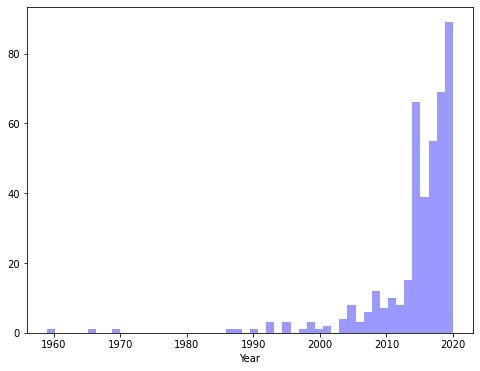

In [ ]:
netflix=df[df["Netflix"]==1]
print("Number of shows on Netflix= ", len(netflix))

pyplot.subplots(figsize=(8,6))
distplot(netflix["Year"],kde=False, color="blue")

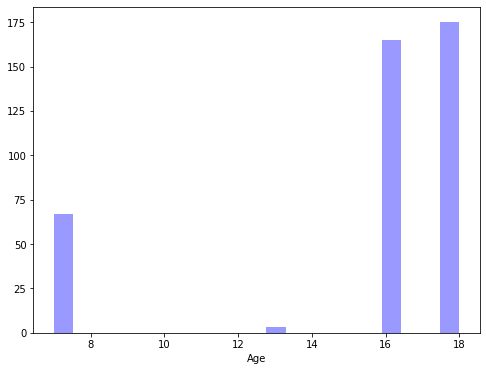

In [ ]:
pyplot.subplots(figsize=(8,6))
distplot(netflix["Age"],kde=False, color="blue")

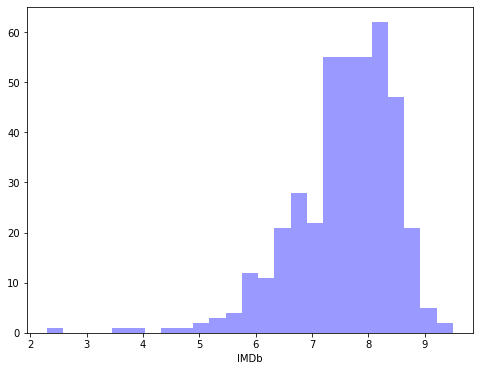

In [ ]:
pyplot.subplots(figsize=(8,6))
distplot(netflix["IMDb"],kde=False, color="blue")

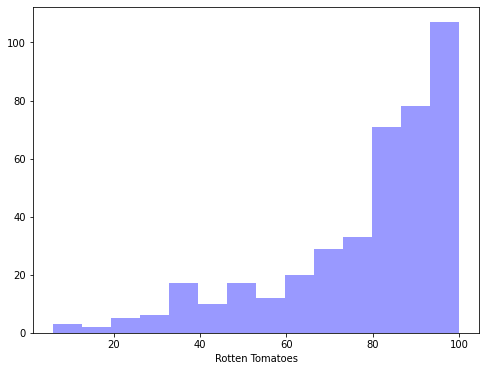

In [ ]:
pyplot.subplots(figsize=(8,6))
distplot(netflix["Rotten Tomatoes"],kde=False, color="blue")

In [ ]:
print("The Netflix shows with the highest IMDb ratings are")
print((netflix.sort_values("IMDb",ascending=False).head(10))['Title'])
print()
print("and the ones with the lowest")
print((netflix.sort_values("IMDb",ascending=True).head(10))['Title'])

The Netflix shows with the highest IMDb ratings are
0                         Breaking Bad
91                          Our Planet
9           Avatar: The Last Airbender
3                             Sherlock
97                     The Vietnam War
15    Fullmetal Alchemist: Brotherhood
59                   The Twilight Zone
41                    When They See Us
5                           The Office
23                       One-Punch Man
Name: Title, dtype: object

and the ones with the lowest
1498                    The Goop Lab
1102        Bill Nye Saves the World
889             Troy: Fall of a City
840                       The I-Land
867                   Brews Brothers
630                     Another Life
1188                Prank Encounters
1158    The Break with Michelle Wolf
664        Fast & Furious Spy Racers
537                         The Mist
Name: Title, dtype: object


In [ ]:
print("The Netflix shows with the highest RT scores are")
print((netflix.sort_values("Rotten Tomatoes",ascending=False).head(10))['Title'])
print()
print("and the ones with the lowest")
print((netflix.sort_values("Rotten Tomatoes",ascending=True).head(10))['Title'])

The Netflix shows with the highest RT scores are
75                     Master of None
385          3Below: Tales of Arcadia
287                        The Hollow
278                     The Chef Show
482                        Seis Manos
171                     Ripper Street
275       Abstract: The Art of Design
274                       Secret City
505                         Diagnosis
817    The Honeymoon Stand Up Special
Name: Title, dtype: object

and the ones with the lowest
630               Another Life
840                 The I-Land
322                 Insatiable
1426              Pacific Heat
687                 Disjointed
1507                  Westside
598                    Between
834                      Valor
643     The Mysteries of Laura
426       Friends from College
Name: Title, dtype: object


In [ ]:
netflix1=netflix.sort_values("IMDb",ascending=False).head(100)[['Title',"IMDb"]]
print(netflix1.head())
tuples_netflix_imdb = [tuple(x) for x in netflix1.values]
tuples_netflix_imdb[0:10]

                         Title  IMDb
0                 Breaking Bad   9.5
91                  Our Planet   9.3
9   Avatar: The Last Airbender   9.2
3                     Sherlock   9.1
97             The Vietnam War   9.1


[('Breaking Bad', 9.5),
 ('Our Planet', 9.3),
 ('Avatar: The Last Airbender', 9.2),
 ('Sherlock', 9.1),
 ('The Vietnam War', 9.1),
 ('Fullmetal Alchemist: Brotherhood', 9.1),
 ('The Twilight Zone', 9.0),
 ('When They See Us', 8.9),
 ('The Office', 8.9),
 ('One-Punch Man', 8.8)]

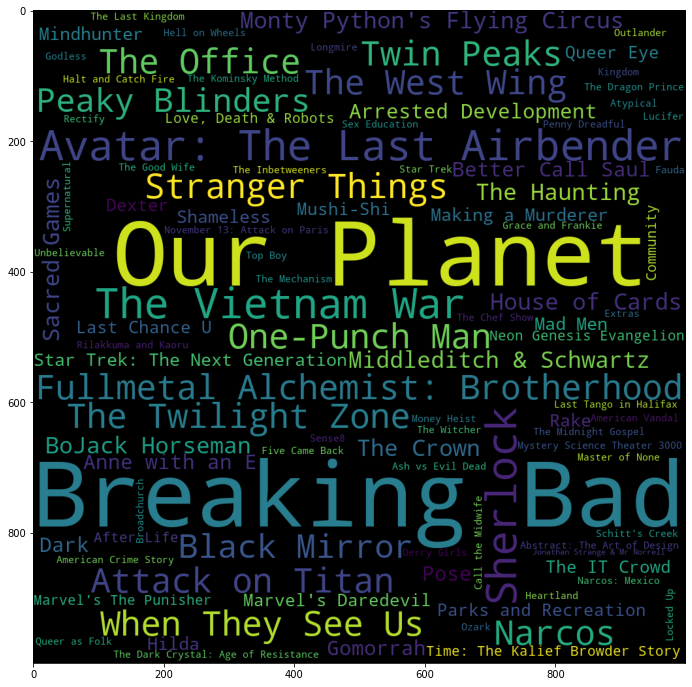

In [ ]:
wordcloud_netflix_imdb = WordCloud(width=1000,height=1000).generate_from_frequencies(dict(tuples_netflix_imdb))
pyplot.subplots(figsize=(12,12))
pyplot.imshow(wordcloud_netflix_imdb)

In [ ]:
netflix2=netflix.sort_values("Rotten Tomatoes",ascending=False).head(100)[['Title',"Rotten Tomatoes"]]
print(netflix2.head())
tuples_netflix_tomatoes = [tuple(x) for x in netflix2.values]

                        Title  Rotten Tomatoes
75             Master of None            100.0
385  3Below: Tales of Arcadia            100.0
287                The Hollow            100.0
278             The Chef Show            100.0
482                Seis Manos            100.0


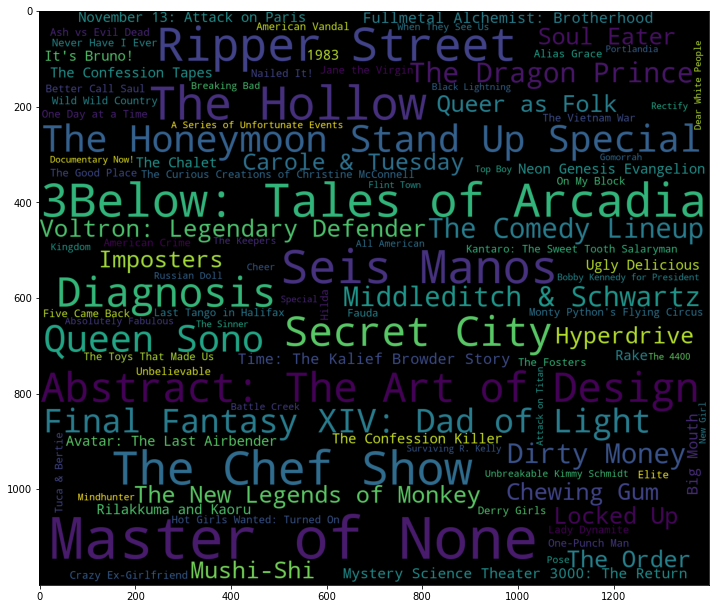

In [ ]:
wordcloud_netflix_tomatoes = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuples_netflix_tomatoes))
pyplot.subplots(figsize=(12,12))
pyplot.imshow(wordcloud_netflix_tomatoes)

 # CLUSTERING

In [ ]:
ratings=df[["Title",'IMDb',"Rotten Tomatoes"]]
print(ratings.head())
print(len(ratings))
print(ratings.info())
ratings=ratings.dropna()

              Title  IMDb  Rotten Tomatoes
0      Breaking Bad   9.5             96.0
1   Stranger Things   8.8             93.0
2       Money Heist   8.4             91.0
3          Sherlock   9.1             78.0
4  Better Call Saul   8.7             97.0
915
<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 5575
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            915 non-null    object 
 1   IMDb             915 non-null    float64
 2   Rotten Tomatoes  915 non-null    float64
dtypes: float64(2), object(1)
memory usage: 28.6+ KB
None


In [ ]:
ratings["IMDb"]=ratings["IMDb"]*10
print(ratings.head())
X=ratings[["IMDb","Rotten Tomatoes"]]
X.head()

              Title  IMDb  Rotten Tomatoes
0      Breaking Bad  95.0             96.0
1   Stranger Things  88.0             93.0
2       Money Heist  84.0             91.0
3          Sherlock  91.0             78.0
4  Better Call Saul  87.0             97.0


,IMDb,Rotten Tomatoes
0,95.0,96.0
1,88.0,93.0
2,84.0,91.0
3,91.0,78.0
4,87.0,97.0


In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

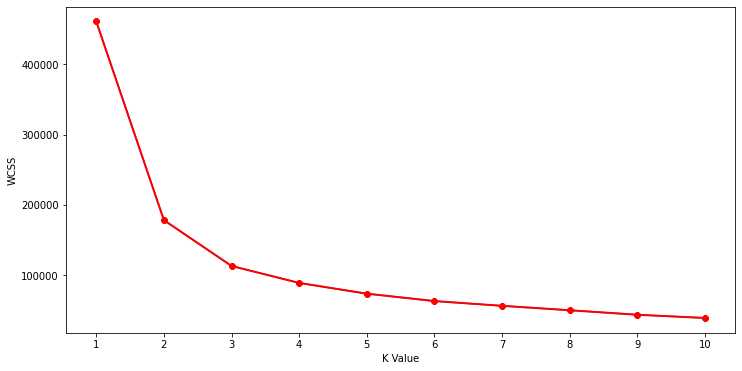

In [ ]:
pyplot.figure(figsize=(12,6))
pyplot.plot(range(1,11),wcss)
pyplot.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
pyplot.xlabel("K Value")
pyplot.xticks(arange(1,11,1))
pyplot.ylabel("WCSS")
pyplot.show()

In [ ]:
km=KMeans(n_clusters=4)
km.fit(X)
y=km.predict(X)
ratings["label"] = y
ratings.head()

,Title,IMDb,Rotten Tomatoes,label
0,Breaking Bad,95.0,96.0,1
1,Stranger Things,88.0,93.0,1
2,Money Heist,84.0,91.0,1
3,Sherlock,91.0,78.0,1
4,Better Call Saul,87.0,97.0,1


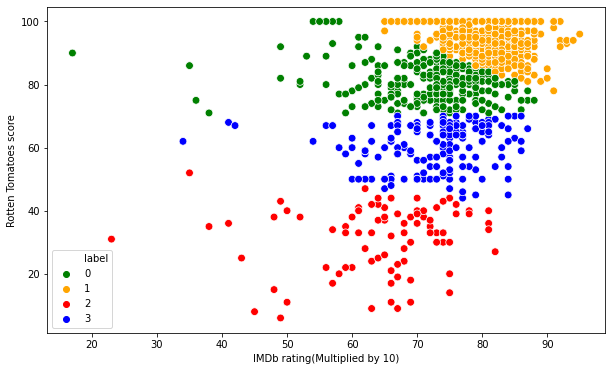

In [ ]:
pyplot.figure(figsize=(10,6))
scatterplot(x='IMDb', y='Rotten Tomatoes', hue="label", palette=['green','orange','red',"blue"], legend='full', data=ratings, s=60)
pyplot.xlabel('IMDb rating(Multiplied by 10)')
pyplot.ylabel('Rotten Tomatoes score') 
pyplot.show()

In [ ]:
for numclu in range(4):
    print('Number of shows in cluster', numclu)
    print(len(ratings[ratings["label"] == numclu]))

Number of shows in cluster 0
270
Number of shows in cluster 1
388
Number of shows in cluster 2
88
Number of shows in cluster 3
169


In [ ]:
for clust in range(4):
    print('Cluster number', clust)
    print(ratings[ratings["label"] == clust]["Title"].values, '\n')

Cluster number 0
['The Walking Dead' 'Ozark' 'Dexter' 'House of Cards' "Grey's Anatomy"
 'Arrested Development' 'The Vampire Diaries' 'Family Guy'
 'Pretty Little Liars' 'Arrow' 'Tiger King: Murder, Mayhem and Madness'
 'Love, Death & Robots' "Marvel's Jessica Jones" 'The Umbrella Academy'
 'The West Wing' 'Once Upon a Time' 'Riverdale' 'Gotham'
 'I Am Not Okay with This' 'Star Trek' 'The OA' 'Outer Banks'
 'Chilling Adventures of Sabrina' 'Doctor Foster' 'Into the Badlands'
 'Gossip Girl' 'Lost in Space' "DC's Legends of Tomorrow" 'Charmed'
 'Maniac' "Marvel's Luke Cage" 'The Stranger' 'Into the Night'
 'Mystery Science Theater 3000' 'Reign' 'The Borgias'
 'Designated Survivor' 'Hell on Wheels' 'Hawaii Five-0'
 "Marvel's The Defenders" 'Supergirl' 'Star Trek: Voyager'
 'The Shannara Chronicles' 'Hart of Dixie' "TURN: Washington's Spies"
 'Episodes' 'Living with Yourself' 'Nurse Jackie' 'Glee' 'Helix' 'Safe'
 'Evil Genius' 'Glitch' 'GHOUL' 'The Society' 'Dracula' 'Quantico'
 'The Mecha